C:\Users\janan\AppData\Local\Temp\ipykernel_6804\3502176514.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_gender_sales = pd.read_sql(query, conn)


   Gender  Total_Sales
0    Male   3868845.83
1  Female   3813837.73


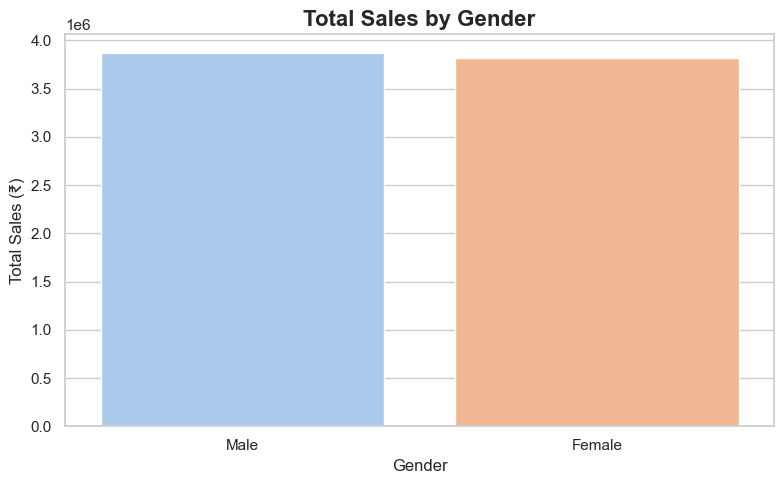

In [26]:
# -- 1. Customer Behaviour & Segmentation--
#1.Which customer segment (by Gender ) generates the highest total sales?
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Call stored procedure and load results into pandas DataFrame
query = "CALL GetTotalSalesByGender()"
df_gender_sales = pd.read_sql(query, conn)

# Display results
print(df_gender_sales)

# --- Visualization ---
sns.set(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))
sns.barplot(data=df_gender_sales, x='Gender', y='Total_Sales', hue='Gender', dodge=False)
plt.title("Total Sales by Gender", fontsize=16, weight='bold')
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Total Sales (₹)", fontsize=12)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

C:\Users\janan\AppData\Local\Temp\ipykernel_6804\2121438380.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_location_sales = pd.read_sql(query, conn)


      Location  Total_Sales
0  Los Angeles   1568597.72
1      Chicago   1554205.80
2      Houston   1536916.04
3        Miami   1531684.14
4     New York   1491279.86


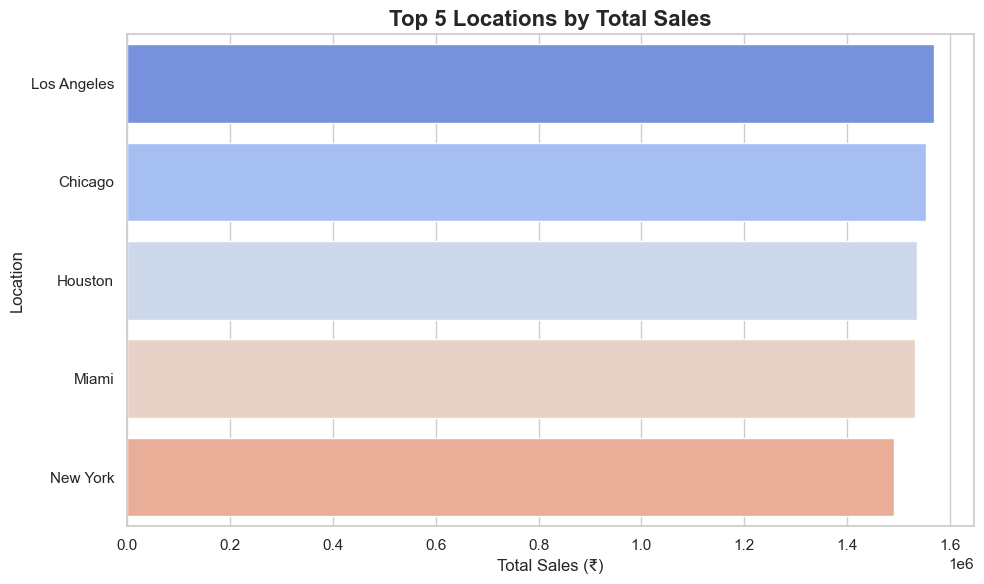

In [23]:
#1.Which customer segment (location ) generates the highest total sales?
# --- Call Stored Procedure ---
query = "CALL GetTotalSalesByLocation()"
df_location_sales = pd.read_sql(query, conn)

# --- Display the DataFrame ---
print(df_location_sales.head())

# --- Visualization: Top 5 Locations by Total Sales ---
sns.set(style="whitegrid", palette="coolwarm")

plt.figure(figsize=(10,6))
top5 = df_location_sales.head(5)  # if many locations, show top 10
sns.barplot(data=top5, x='Total_Sales', y='Location', hue='Location', dodge=False)
plt.title("Top 5 Locations by Total Sales", fontsize=16, weight='bold')
plt.xlabel("Total Sales (₹)", fontsize=12)
plt.ylabel("Location", fontsize=12)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

C:\Users\janan\AppData\Local\Temp\ipykernel_6804\1346649019.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_tenure = pd.read_sql(query, conn)


Average Spend Comparison (Tenure > 6 months vs New):
  Tenure_Group    Avg_Spend
0          New  1622.524331
1  Long-Tenure  1526.812378


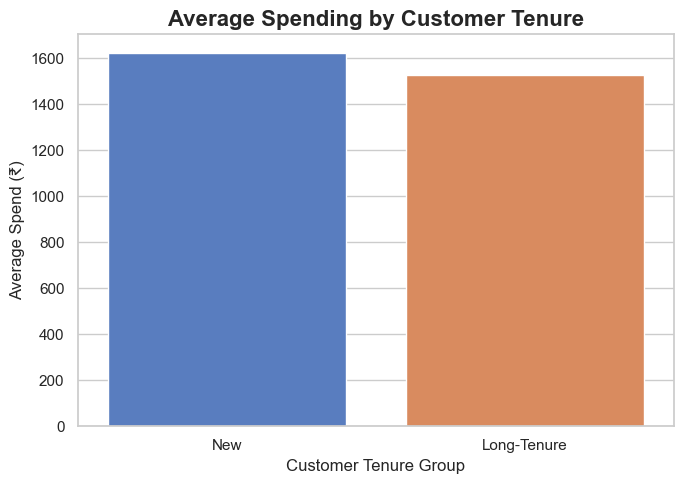

In [24]:
#2. Do long-tenure customers (Tenure Months > X) spend more on average than new customers?
# --- Call Stored Procedure (Threshold = 6 months) ---
query = "CALL CompareTenureSpending(6);"
df_tenure = pd.read_sql(query, conn)

# --- Display Results ---
print("Average Spend Comparison (Tenure > 6 months vs New):")
print(df_tenure)

# --- Visualization: Bar Chart ---
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(7,5))
sns.barplot(data=df_tenure, x='Tenure_Group', y='Avg_Spend', hue='Tenure_Group', dodge=False)
plt.title("Average Spending by Customer Tenure", fontsize=16, weight='bold')
plt.xlabel("Customer Tenure Group", fontsize=12)
plt.ylabel("Average Spend (₹)", fontsize=12)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

C:\Users\janan\AppData\Local\Temp\ipykernel_6804\366877383.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_aov = pd.read_sql(query, conn)


Average Transaction Value per Customer:
   CustomerID  AvgOrderValue
0       12499        5043.19
1       11651        5040.41
2       14030        5025.41
3       11035        5020.72
4       11735        5011.30
5       10429        5008.05
6       11852        5003.74
7       14131        4993.71
8       13946        4990.37
9       14978        4969.82


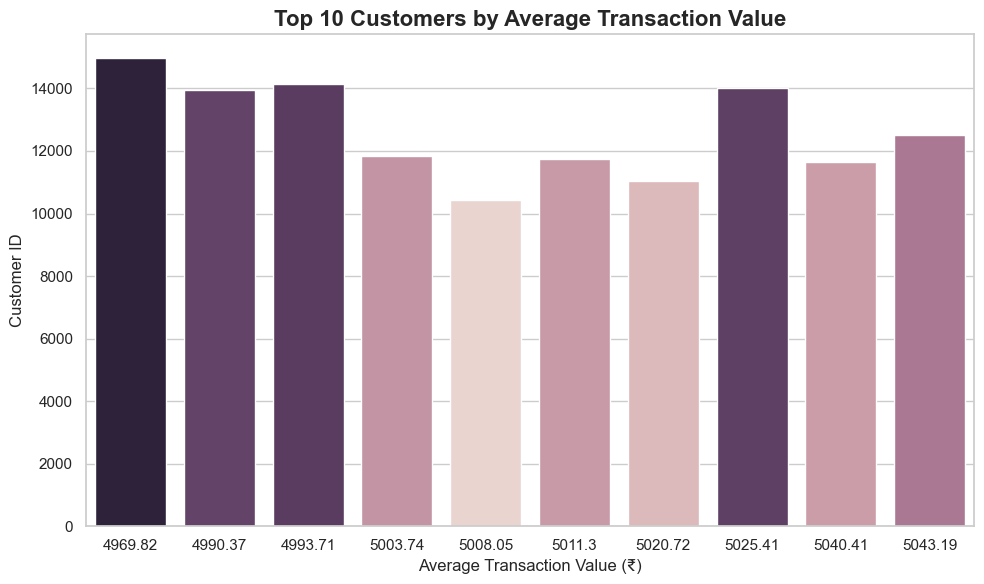

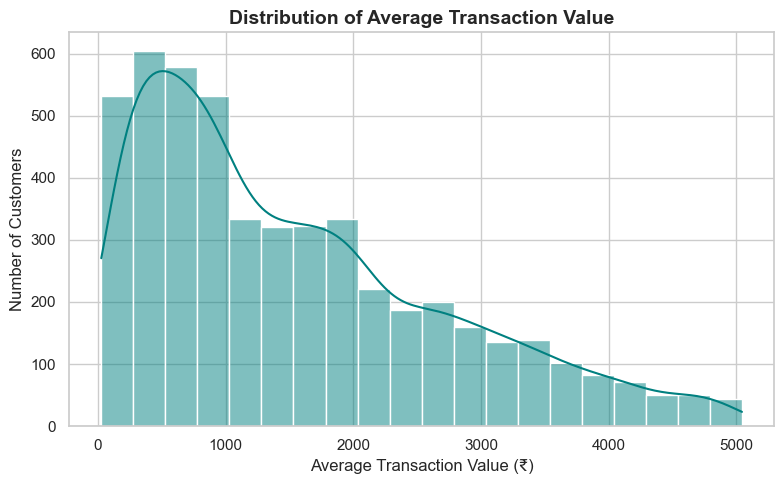

In [27]:
#3. What is the average transaction value per customer?
# --- Call Stored Procedure ---
query = "CALL GetAverageOrderValue();"
df_aov = pd.read_sql(query, conn)

# --- Display Results ---
print("Average Transaction Value per Customer:")
print(df_aov.head(10))  # show top 10 customers

# --- Visualization: Top 10 Customers by Average Order Value ---
sns.set(style="whitegrid", palette="coolwarm")

top10 = df_aov.head(10)  # top 10 customers with highest average order value

plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='AvgOrderValue', y='CustomerID', hue='CustomerID', dodge=False)
plt.title("Top 10 Customers by Average Transaction Value", fontsize=16, weight='bold')
plt.xlabel("Average Transaction Value (₹)", fontsize=12)
plt.ylabel("Customer ID", fontsize=12)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

# --- Optional: Distribution Plot (How AvgOrderValue varies across all customers) ---
plt.figure(figsize=(8,5))
sns.histplot(df_aov['AvgOrderValue'], bins=20, kde=True, color='teal')
plt.title("Distribution of Average Transaction Value", fontsize=14, weight='bold')
plt.xlabel("Average Transaction Value (₹)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


C:\Users\janan\AppData\Local\Temp\ipykernel_6804\2619916202.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_high_value = pd.read_sql(query, conn)


Top 10% High-Value Customers (Based on Total Purchase Amount):
   CustomerID  TotalSpend
0       12499     5043.19
1       11651     5040.41
2       14030     5025.41
3       11035     5020.72
4       11735     5011.30
5       10429     5008.05
6       11852     5003.74
7       14131     4993.71
8       13946     4990.37
9       14978     4969.82


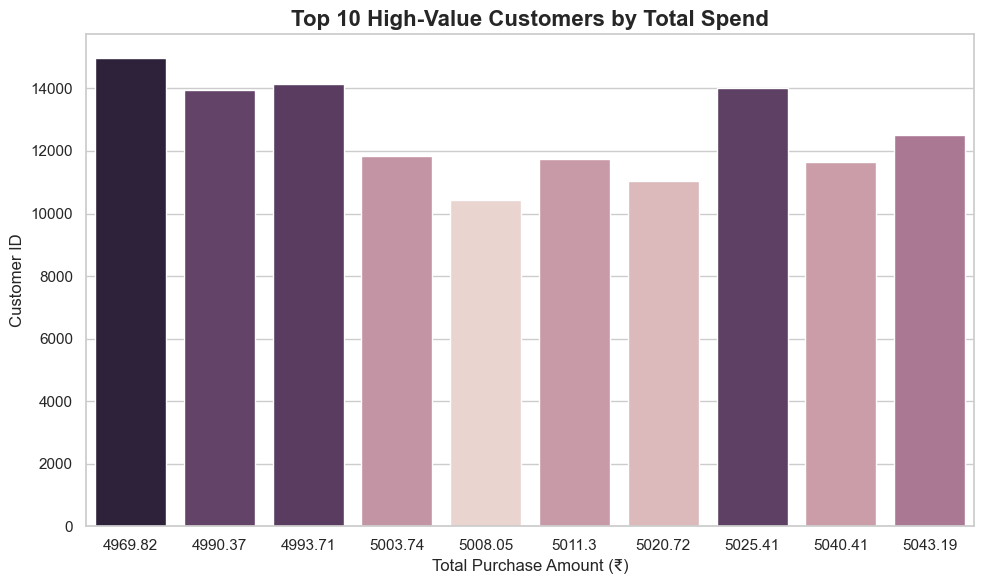

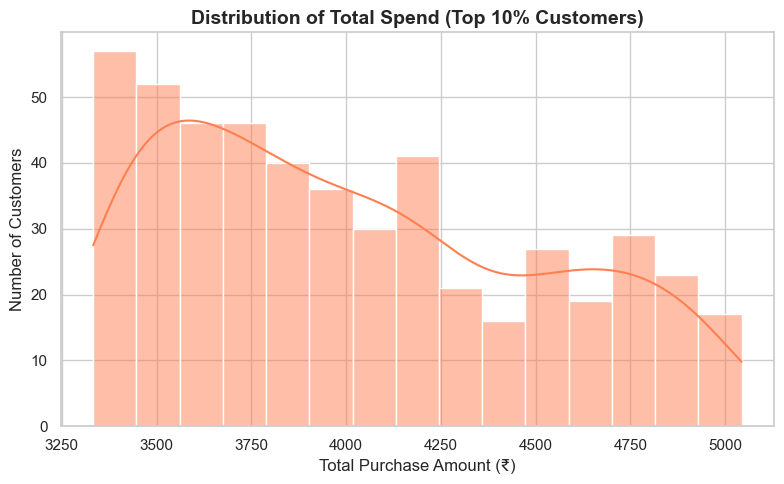

In [28]:
#4. Which customers are high-value (top 10%) based on total purchase amount?
# --- Call Stored Procedure ---
query = "CALL GetHighValueCustomers();"
df_high_value = pd.read_sql(query, conn)

# --- Display Results ---
print("Top 10% High-Value Customers (Based on Total Purchase Amount):")
print(df_high_value.head(10))

# --- Visualization: Top 10 High-Value Customers ---
sns.set(style="whitegrid", palette="mako")

top10 = df_high_value.head(10)  # top 10 for visualization

plt.figure(figsize=(10,6))
sns.barplot(data=top10, x='TotalSpend', y='CustomerID', hue='CustomerID', dodge=False)
plt.title("Top 10 High-Value Customers by Total Spend", fontsize=16, weight='bold')
plt.xlabel("Total Purchase Amount (₹)", fontsize=12)
plt.ylabel("Customer ID", fontsize=12)
plt.legend([],[], frameon=False)
plt.tight_layout()
plt.show()

# --- Optional: Distribution of Total Spend (All High-Value Customers) ---
plt.figure(figsize=(8,5))
sns.histplot(df_high_value['TotalSpend'], bins=15, kde=True, color='coral')
plt.title("Distribution of Total Spend (Top 10% Customers)", fontsize=14, weight='bold')
plt.xlabel("Total Purchase Amount (₹)")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()